In [175]:
import os
import requests
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [95]:
# Make a list of all csv files in folder
files = os.listdir('../NYCDSA_Project_1/Data')

#Read all files 
df_files = [pd.read_table(f'../NYCDSA_Project_1/Data/{file}', sep=',') for file in files]

df_beqom = pd.concat(df_list).reset_index(drop=True)

In [96]:
df_beqom.count()

Passport             11749
Endpoint             11749
Tenant               11749
Client               11749
ConfigurationMode    11749
Date                 11749
Details              11749
IP                   11749
dtype: int64

In [97]:
df_beqom.dtypes

Passport             object
Endpoint             object
Tenant               object
Client               object
ConfigurationMode    object
Date                 object
Details              object
IP                   object
dtype: object

In [98]:
df_beqom.isnull().sum()

Passport             0
Endpoint             0
Tenant               0
Client               0
ConfigurationMode    0
Date                 0
Details              0
IP                   0
dtype: int64

In [99]:
df_beqom['Date'] = pd.to_datetime(df_beqom['Date'], infer_datetime_format=True)

In [100]:
df_beqom.dtypes

Passport                     object
Endpoint                     object
Tenant                       object
Client                       object
ConfigurationMode            object
Date                 datetime64[ns]
Details                      object
IP                           object
dtype: object

In [101]:
df_beqom.head()

,Passport,Endpoint,Tenant,Client,ConfigurationMode,Date,Details,IP
0,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:03:52,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26
1,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:03:40,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26
2,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:02:03,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26
3,SERGII.POSTNYI@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 19:11:20,EndpointURL: https://9r1-prod-neu-app.beqom.co...,188.163.81.49
4,SRDJAN.RADOVIC@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 18:53:25,EndpointURL: https://9r1-prod-neu-app.beqom.co...,24.135.106.86


In [102]:
df_beqom.tail()

,Passport,Endpoint,Tenant,Client,ConfigurationMode,Date,Details,IP
11744,LUAY.ANSHASI@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 11:36:05,EndpointURL: https://9r1-prod-neu-app.beqom.co...,176.28.189.62
11745,HAMZA.ELAYAN@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 11:33:33,EndpointURL: https://9r1-prod-neu-app.beqom.co...,92.253.46.113
11746,BRIDGET.NGOMA@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 09:37:19,EndpointURL: https://9r1-prod-neu-app.beqom.co...,41.175.18.38
11747,VITALIY.SHUSHKANOV@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 09:34:25,EndpointURL: https://9r1-prod-neu-app.beqom.co...,5.18.189.53
11748,MARIANALEXANDRU.CRISTACHE@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 02:42:03,EndpointURL: https://9r1-prod-neu-app.beqom.co...,109.166.235.170


In [110]:
# ip_list = df_beqom['IP'].to_numpy()
# print(f'Number of all IP addresses {len(ip_list)}')
# unique_ip = np.unique(ip_list)
# print(f'Number of unique IP addresses {len(unique_ip)}')

print(f"Total number of IP addresses {df_beqom['IP'].count()}")

unique_ip = df_beqom['IP'].unique().tolist()
print(f"Total number of UNIQUE IP addresses {len(unique_ip)}")

Total number of IP addresses 11749
Total number of UNIQUE IP addresses 5018


In [ ]:
# Based on unique IP address get specific location
# To get specific location we use API point http://ip-api.com/batch
# When building request you need to take into consideration
# - A request needs to formatted as a JSON array, containing up to 100 IP addresses or objects.
# - This endpoint is limited to 15 requests per minute from an IP address. --> 60s/15 = 4 times per minute

In [111]:
url = "http://ip-api.com/batch"

In [112]:
# split list unique_ip to lists containing 100 elements only
number_elements = 100
unique_ip_split = [ unique_ip[ip_element:ip_element + number_elements] for ip_element in range(0, len(unique_ip), number_elements)]

In [114]:
len(unique_ip_split)

51

In [140]:
response_dict = []
for item in range(0, len(unique_ip_split)):
    time_start = time.perf_counter()
    params = unique_ip_split[item]
    response = requests.post(url=url, json=params).json()
#     print(len(response))
    for element in response:
        response_dict.append(element)
    time_end = time.perf_counter()
    print(f'Time to get one set of data from ip-api {time_end - time_start:0.4f} seconds')
    time.sleep(5)

Time to get one set of data from ip-api 0.1511 seconds
Time to get one set of data from ip-api 0.1630 seconds
Time to get one set of data from ip-api 0.1805 seconds
Time to get one set of data from ip-api 0.1805 seconds
Time to get one set of data from ip-api 0.1544 seconds
Time to get one set of data from ip-api 0.1851 seconds
Time to get one set of data from ip-api 0.6756 seconds
Time to get one set of data from ip-api 0.2054 seconds
Time to get one set of data from ip-api 0.1595 seconds
Time to get one set of data from ip-api 0.1681 seconds
Time to get one set of data from ip-api 0.1978 seconds
Time to get one set of data from ip-api 0.1609 seconds
Time to get one set of data from ip-api 0.1857 seconds
Time to get one set of data from ip-api 0.2106 seconds
Time to get one set of data from ip-api 0.2401 seconds
Time to get one set of data from ip-api 0.6531 seconds
Time to get one set of data from ip-api 0.1664 seconds
Time to get one set of data from ip-api 0.2410 seconds
Time to ge

In [141]:
len(response_dict)

5018

In [146]:
df_country = pd.DataFrame(response_dict)

In [158]:
# check if we have any faild IP recogntion
df_country.loc[df_country['status'] != 'success'].count()

status         0
country        0
countryCode    0
region         0
regionName     0
city           0
zip            0
lat            0
lon            0
timezone       0
isp            0
org            0
as             0
query          0
dtype: int64

In [160]:
df_country.head()

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query
0,success,Mexico,MX,MEX,México,Ciudad Nezahualcoyotl,57000,19.4372,-99.0369,America/Mexico_City,Total Play Telecomunicaciones SA De CV,Total Play Telecomunicaciones SA De CV,,187.189.245.26
1,success,Ukraine,UA,46,Lvivska Oblast,Lviv,,49.8396,24.0297,Europe/Kiev,Kyivstar UA,Kyivstar LLC,AS15895 Kyivstar PJSC,188.163.81.49
2,success,Serbia,RS,00,Belgrade,Belgrade,,44.8166,20.4721,Europe/Belgrade,Serbia Broadband,,AS31042 Serbia BroadBand-Srpske Kablovske mrez...,24.135.106.86
3,success,Switzerland,CH,GE,Geneva,Geneva,1206,46.1922,6.1589,Europe/Zurich,Swisscom (Schweiz) AG - Bluewin,Swisscom,AS3303 Swisscom (Schweiz) AG,92.106.202.206
4,success,Belgium,BE,BRU,Brussels Capital,Brussels,1000,50.8336,4.3337,Europe/Brussels,AS47377 Network - BRAS,Mobistar Enterprise Services,AS47377 Orange Belgium SA,94.109.218.47


In [170]:
df_beqom_country = df_beqom.merge(df_country, left_on='IP',right_on='query', how='left')

In [182]:
df_beqom_country['country'].value_counts()

Ukraine                   1930
Switzerland               1381
Poland                    1224
Russia                    1009
Germany                    549
                          ... 
Bosnia and Herzegovina       2
Monaco                       1
Nepal                        1
Mongolia                     1
Croatia                      1
Name: country, Length: 85, dtype: int64

<AxesSubplot:ylabel='Frequency'>

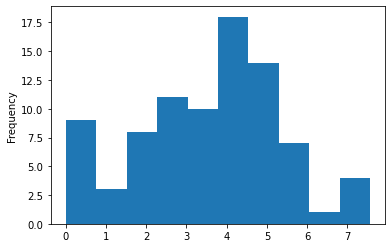

In [183]:
# plt.hist(df_beqom_country['regionName'], bins=20)
region_plot = np.log(df_beqom_country['country'].value_counts())
region_plot.plot.hist()

In [185]:
df_beqom_country

,Passport,Endpoint,Tenant,Client,ConfigurationMode,Date,Details,IP,status,country,...,regionName,city,zip,lat,lon,timezone,isp,org,as,query
0,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:03:52,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26,success,Mexico,...,México,Ciudad Nezahualcoyotl,57000,19.4372,-99.0369,America/Mexico_City,Total Play Telecomunicaciones SA De CV,Total Play Telecomunicaciones SA De CV,,187.189.245.26
1,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:03:40,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26,success,Mexico,...,México,Ciudad Nezahualcoyotl,57000,19.4372,-99.0369,America/Mexico_City,Total Play Telecomunicaciones SA De CV,Total Play Telecomunicaciones SA De CV,,187.189.245.26
2,MIROSLAVA.CARBAJAL@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 21:02:03,EndpointURL: https://9r1-prod-neu-app.beqom.co...,187.189.245.26,success,Mexico,...,México,Ciudad Nezahualcoyotl,57000,19.4372,-99.0369,America/Mexico_City,Total Play Telecomunicaciones SA De CV,Total Play Telecomunicaciones SA De CV,,187.189.245.26
3,SERGII.POSTNYI@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 19:11:20,EndpointURL: https://9r1-prod-neu-app.beqom.co...,188.163.81.49,success,Ukraine,...,Lvivska Oblast,Lviv,,49.8396,24.0297,Europe/Kiev,Kyivstar UA,Kyivstar LLC,AS15895 Kyivstar PJSC,188.163.81.49
4,SRDJAN.RADOVIC@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-05-31 18:53:25,EndpointURL: https://9r1-prod-neu-app.beqom.co...,24.135.106.86,success,Serbia,...,Belgrade,Belgrade,,44.8166,20.4721,Europe/Belgrade,Serbia Broadband,,AS31042 Serbia BroadBand-Srpske Kablovske mrez...,24.135.106.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,LUAY.ANSHASI@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 11:36:05,EndpointURL: https://9r1-prod-neu-app.beqom.co...,176.28.189.62,success,Jordan,...,Amman Governorate,Amman,,31.9522,35.9390,Asia/Amman,Linkdotnet-Jordan,Zain,AS48832 Linkdotnet-Jordan,176.28.189.62
11745,HAMZA.ELAYAN@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 11:33:33,EndpointURL: https://9r1-prod-neu-app.beqom.co...,92.253.46.113,success,Jordan,...,Amman Governorate,Amman,,31.9522,35.9390,Asia/Amman,Jordan Data Communications Company LLC,Jordan Telecom Group,AS8376 Jordan Data Communications Company LLC,92.253.46.113
11746,BRIDGET.NGOMA@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 09:37:19,EndpointURL: https://9r1-prod-neu-app.beqom.co...,41.175.18.38,success,Zambia,...,Lusaka Province,Lusaka,,-15.3875,28.3228,Africa/Lusaka,Liquid Telecommunications Ltd,Liquid Telecommunications Operations Limited,AS30844 Liquid Telecommunications Ltd,41.175.18.38
11747,VITALIY.SHUSHKANOV@JTI.COM,JTI 9r1 Prod,jti.9r1.prod.bqm,JTI,ExternalIdP(JTI (Prod - SAML)),2021-08-01 09:34:25,EndpointURL: https://9r1-prod-neu-app.beqom.co...,5.18.189.53,success,Russia,...,St.-Petersburg,St Petersburg,190990,59.8983,30.2618,Europe/Moscow,Z-Telecom,JSC ER-Telecom,AS41733 JSC ER-Telecom Holding,5.18.189.53


<AxesSubplot:xlabel='city', ylabel='country'>

<Figure size 864x432 with 0 Axes>

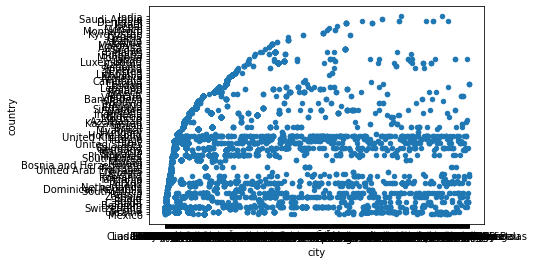

In [193]:
plt.figure(figsize = (12, 6))
df_beqom_country.plot.scatter(x = 'city',y = 'country')

In [197]:
plt.figure(figsize= (20,6))
df_beqom_country[['country', 'Passport']].groupby('country').value_counts().sort_values(ascending = False, by='Passport').plot(kind = 'bar', color = 'b')

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

<Figure size 1440x432 with 0 Axes>